In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Activation,Add,Dense,Conv2D,MaxPooling2D,AveragePooling2D,Flatten,GlobalMaxPooling2D,Dropout,BatchNormalization,Input,Activation,GlobalAveragePooling2D
from keras import callbacks
from tensorflow.keras.utils import to_categorical

In [2]:
train = pd.read_csv('D:\\ML\\DL Repo\\digit-recognizer\\Data\\train.csv')
test = pd.read_csv('D:\\ML\\DL Repo\\digit-recognizer\\Data\\test.csv')

In [10]:
X = np.array(train[train.columns[1:]])
y = train['label']

In [11]:
y_train = to_categorical(y)

In [13]:
X = X.reshape((X.shape[0],28,28,1))
X_train = X/255

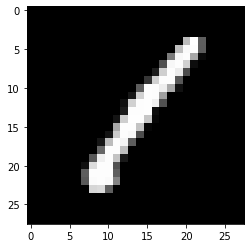

In [14]:
plt.imshow(X_train[0],cmap=plt.cm.gray)

In [15]:
X_train.shape,y_train.shape

((42000, 28, 28, 1), (42000, 10))

In [26]:
def make_model():    
    input_shape = X_train.shape[1:]
    num_classes = 10

    input_layer = Input(input_shape)
    #input_layer = BatchNormalization()(input_layer)


    conv1 = Conv2D(filters=64, kernel_size=3, padding="same", use_bias = False)(input_layer)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    
    pool1 = MaxPooling2D(3)(conv1)
    pool1 = Dropout(0.2)(pool1)
    
    conv2 = Conv2D(filters=64, kernel_size=3, padding="same", use_bias = False)(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    
    pool2 = MaxPooling2D(3)(conv2)
    pool2 = Dropout(0.2)(pool2)
    
    conv3 = Conv2D(filters=64, kernel_size=3, padding="same", use_bias = False)(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)

    gap = MaxPooling2D(3)(conv3)
    gap = Flatten()(gap)
    gap = Dropout(0.5)(gap)

    output_layer = Dense(num_classes, activation="softmax")(gap)

    return Model(inputs=input_layer, outputs=output_layer)


model = make_model()

In [27]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
callbacks = [callbacks.ModelCheckpoint("D:\\ML\\DL Repo\\digit-recognizer\\model\\best_2D_CNN_model.h5", save_best_only=True, monitor="val_loss"),
             callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001),
             callbacks.EarlyStopping(monitor="val_loss", patience=20, verbose=1)]

In [28]:
history = model.fit(X_train,y_train,epochs=500,batch_size=128,validation_split=0.2,callbacks=callbacks)

Epoch 1/500
263/263 [==============================] - 3s 10ms/step - loss: 1.3541 - accuracy: 0.5960 - val_loss: 3.9055 - val_accuracy: 0.1131 - lr: 0.0010
Epoch 2/500
263/263 [==============================] - 2s 7ms/step - loss: 0.3927 - accuracy: 0.8736 - val_loss: 1.6220 - val_accuracy: 0.3982 - lr: 0.0010
Epoch 3/500
263/263 [==============================] - 2s 6ms/step - loss: 0.2543 - accuracy: 0.9222 - val_loss: 0.0797 - val_accuracy: 0.9782 - lr: 0.0010
Epoch 4/500
263/263 [==============================] - 2s 8ms/step - loss: 0.1934 - accuracy: 0.9423 - val_loss: 0.0598 - val_accuracy: 0.9830 - lr: 0.0010
Epoch 5/500
263/263 [==============================] - 1s 5ms/step - loss: 0.1658 - accuracy: 0.9516 - val_loss: 0.0694 - val_accuracy: 0.9785 - lr: 0.0010
Epoch 6/500
263/263 [==============================] - 2s 8ms/step - loss: 0.1346 - accuracy: 0.9611 - val_loss: 0.0462 - val_accuracy: 0.9861 - lr: 0.0010
Epoch 7/500
263/263 [==============================] - 1s 5ms/s

In [32]:
model = keras.models.load_model('D:\\ML\\DL Repo\\digit-recognizer\\model\\best_2D_CNN_model.h5')

In [34]:
X_test = np.array(test).reshape((test.shape[0],28,28,1))
X_test = X_test/255
test_y = model.predict(X_test)

In [35]:
dic = {'ImageId':[],'Label':[]}
for i in range(len(test_y)):
    dic['ImageId'].append(i+1)
    dic['Label'].append(np.argmax(test_y[i]))

In [36]:
test_df = pd.DataFrame.from_dict(dic)
test_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [37]:
test_df.to_csv('D:\\ML\\DL Repo\\digit-recognizer\\Out\\my_submission_file_2D_CNN.csv', index=False)

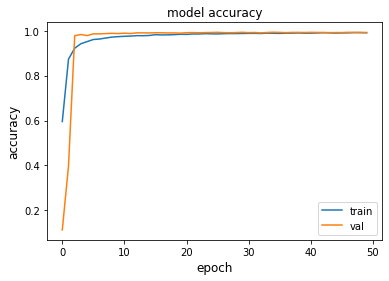

In [29]:
metric = "accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [38]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        576       
                                                                 
 batch_normalization_17 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 activation_15 (Activation)  (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 9, 9, 64)         0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 9, 9, 64)          0   